In [5]:
from astropy.io import fits
from astropy.wcs import wcs
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import mlab

In [71]:
with fits.open('id11_Coma10.rev0026-2180_mapdld.fits', mode='update') as hdul:
    ResGaussian=translation(hdul,GaussianMatr)
    print("Gauss",ResGaussian[ObjectVol][ObjectVol])
    ResBeta=translation(hdul,BetaMatr)
    print("Beta",ResBeta[ObjectVol][ObjectVol])
    hdul.flush()
    hdul.close()


with fits.open("id11_Coma10.rev0026-2180.fpsf.fits", mode='update') as hdul:
    print("fpsf",hdul[0].data[i_center][j_center])
    hdul.flush()
    hdul.close()
with fits.open("id11_Coma10.rev0026-2180.epsf.fits", mode='update') as hdul:
    print("epsf",hdul[0].data[i_center][j_center])
    hdul.flush()
    hdul.close()

Gauss 2.234652007186571
Beta 1.2026188670371005
fpsf 2.2317533
epsf 0.18629406


Circle Radial Profile
radial [ 2.28358481  2.02571722  1.51195887  1.02945717  0.61755516  0.26240341
  0.05792733  0.02503688  0.03628852  0.02439014 -0.02006357 -0.046496
 -0.03935117  0.00592188  0.02151327  0.01676848]
errors [0.82313567 0.29155455 0.20604524 0.1844077  0.16845493 0.13045498
 0.13760953 0.11916367 0.11041211 0.11041842 0.10027226 0.10339182
 0.09255287 0.08634258 0.08831825 0.08461525]
fpsf radial [ 2.28017783  2.0224335   1.50789824  1.02443441  0.61216078  0.25788759
  0.05492918  0.02361003  0.03570502  0.02438798 -0.02006593 -0.04662826
 -0.03963444  0.00593591  0.02177889  0.01714409]


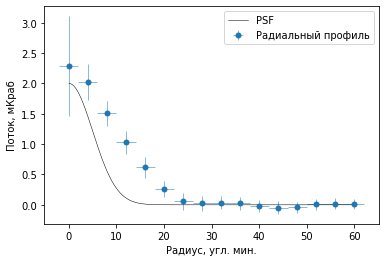

In [96]:
print("Circle Radial Profile")
with fits.open('id11_Coma10.rev0026-2180_mapdld.fits', mode='update') as hdul:
    
    radial,errors =Radial_Profile(i_center,j_center,hdul,ResGaussian)
    print("radial",radial)
    print("errors",errors)
    #plt.scatter(range(0,len(radial)),radial,color="blue")
    
    myfile=fits.open("id11_Coma10.rev0026-2180.fpsf.fits")
    fpsfMatrix=np.zeros((2*ObjectVol+1,2*ObjectVol+1))
    for i in range(i_borders[0],i_borders[1]+1):
        for j in range(j_borders[0],j_borders[1]+1):
            fpsfMatrix[i-i_borders[0]][j-j_borders[0]]=myfile[0].data[i][j]
            
    fpsf_radial,fpsf_errors =Radial_Profile(i_center,j_center,myfile,fpsfMatrix)
    print("fpsf radial",fpsf_radial)
    r4=range(0,4*len(radial),4)
    xerr4=4*(np.ones_like(radial))/2
    plt.errorbar(r4, radial,xerr=xerr4,yerr=errors, fmt='o',linewidth=0.5,mew=0,label='Радиальный профиль')
    plt.plot(x_gaus,2*y_gaus,color='black',label='PSF',linewidth=0.5)
    #plt.scatter(range(0,len(radial)),fpsf_radial,color="red")
    plt.xlabel("Радиус, угл. мин.")
    plt.ylabel('Поток, мКраб')
    plt.legend()
    plt.savefig("Radial_profile_new_data.jpg",dpi=1000)
    plt.show()
    myfile.close()
    hdul.flush()
    hdul.close()

Discrete Radial Profile
radial [ 2.28358481e+00  2.02571722e+00  1.51195887e+00  9.66213331e-01
  5.06706995e-01  1.95171653e-01  5.16238454e-02  1.13132276e-02
  7.89642018e-05 -1.46293608e-02 -2.48200056e-02 -5.06310320e-03
  2.35276138e-02  2.44238287e-02  9.34424108e-03  2.72360132e-03]
errors [0.82313567 0.29155455 0.20604524 0.16834092 0.14592931 0.13047482
 0.11915024 0.11037167 0.10331344 0.09741789 0.09250318 0.08823675
 0.08456758 0.08125089 0.07839891 0.07579971]
fpsf radial [ 2.28017783e+00  2.02243350e+00  1.50789824e+00  9.61257290e-01
  5.01751610e-01  1.91120468e-01  4.96483677e-02  1.04524714e-02
 -5.84876514e-04 -1.50020078e-02 -2.48413560e-02 -4.88641835e-03
  2.36203083e-02  2.44107969e-02  9.36635257e-03  2.90400434e-03]


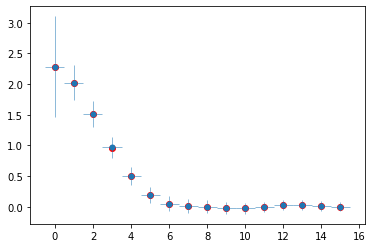

In [74]:
print("Discrete Radial Profile")
with fits.open('id11_Coma10.rev0026-2180_mapdld.fits', mode='update') as hdul:
    radial,errors =discrete_Radial_Profile(i_center,j_center,hdul,ResGaussian)
    print("radial",radial)
    print("errors",errors)
    #plt.scatter(range(0,len(radial)),radial,color="blue")
    
    myfile=fits.open("id11_Coma10.rev0026-2180.fpsf.fits")
    fpsfMatrix=np.zeros((2*ObjectVol+1,2*ObjectVol+1))
    for i in range(i_borders[0],i_borders[1]+1):
        for j in range(j_borders[0],j_borders[1]+1):
            fpsfMatrix[i-i_borders[0]][j-j_borders[0]]=myfile[0].data[i][j]
            
    fpsf_radial,fpsf_errors =discrete_Radial_Profile(i_center,j_center,myfile,fpsfMatrix)
    print("fpsf radial",fpsf_radial)
    plt.errorbar(range(0,len(radial)), radial,xerr=(np.ones_like(radial))/2,yerr=errors, fmt='o',linewidth=0.5,mew=0)
    plt.scatter(range(0,len(radial)),fpsf_radial,color="red")
    #plt.savefig("Radial_discrete")
    plt.show()
    myfile.close()
    hdul.flush()
    hdul.close()

Increase curve
radial non folded [ 2.97728562 24.08400738 50.37696919 71.32180252 87.70351645 94.39199744
 90.62604806 89.3219517  93.48802695 99.62667838 95.76899432 88.48999408
 84.3020593  86.78971792 91.82798452 93.09993899]
radial Gauss [ 2.28358481 18.48932256 42.68066453 63.26980786 78.09113159 88.58726784
 90.67265157 91.87442183 93.90657874 95.27242652 93.90810359 90.93235951
 87.78426584 88.3290784  90.22224629 91.83202034]
radial Beta [ 1.22060824 10.2291825  24.95374556 39.05412645 51.17518551 63.78121409
 70.50019743 76.29182209 80.79322601 83.67414713 85.39973077 86.00198215
 86.3618336  87.34690361 88.42196792 89.34703553]
errors [0.82313567 0.27482457 0.16485727 0.12290452 0.09928739 0.07900754
 0.06851752 0.05939862 0.05230948 0.04727308 0.04275943 0.03951362
 0.03634035 0.0334946  0.03131804 0.02937087]


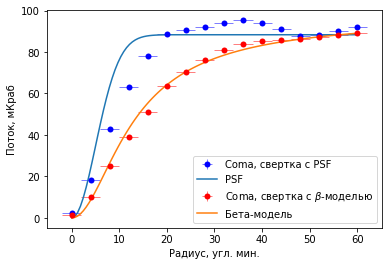

In [95]:
print("Increase curve")
with fits.open('id11_Coma10.rev0026-2180_mapdld.fits', mode='update') as hdul:
    
    #Models
    xlist=np.linspace(0,c,100)
    GaussPlt=[Integrate(lambda s :np.exp(-((s**2/(2*sigma_pix**2)))),x)*88.32907840409364/9.817477304268222 for x in xlist]
    BetaPlt=[Integrate(BetaFunc,x)*87.3469036129761/28.035034154187155 for x in xlist]
    
    #Increase radial nonfolded
    NonfoldMatrix=np.zeros((2*ObjectVol+1,2*ObjectVol+1))
    for i in range(i_borders[0],i_borders[1]+1):
        for j in range(j_borders[0],j_borders[1]+1):
            NonfoldMatrix[i-i_borders[0]][j-j_borders[0]]=hdul[0].data[i][j]
    radialNonFolded,errorsNonFolded =Increase_Curve(i_center,j_center,hdul,NonfoldMatrix)
    print("radial non folded",radialNonFolded)
    #plt.errorbar(range(0,len(radialNonFolded)), radialNonFolded,xerr=(np.ones_like(radialGauss))/2,yerr=errorsNonFolded, fmt='o',linewidth=0.5,mew=0,color="black")
    
    
    #Increase radial Gaussian
    radialGauss,errorsGauss =Increase_Curve(i_center,j_center,hdul,ResGaussian)
    print("radial Gauss",radialGauss)
    line1=plt.errorbar(r4, radialGauss,xerr=xerr4,yerr=errorsGauss,label='Coma, свертка с PSF',fmt='o',linewidth=0.5,mew=0,color="blue")
    line2, =plt.plot(4*xlist,GaussPlt,label='PSF')
    
    #Increase radial Beta
    radialBeta,errorsBeta =Increase_Curve(i_center,j_center,hdul,ResBeta)
    print("radial Beta",radialBeta)
    print("errors",errorsBeta)
    line3=plt.errorbar(r4, radialBeta,xerr=xerr4,yerr=errorsBeta,label='Coma, свертка с '+ r'$\beta$-моделью',fmt='o',linewidth=0.5,mew=0,color="red")
    

    
    
    line4, =plt.plot(4*xlist,BetaPlt,label='Бета-модель')
    plt.xlabel("Радиус, угл. мин.")
    plt.ylabel('Поток, мКраб')
    plt.legend(handles=(line1,line2,line3,line4),loc='lower right')
    plt.savefig("Increase_curve_new_data.jpg",dpi=1000)
    hdul.flush()
    hdul.close()

In [83]:
print(r4,radialBeta)

range(0, 64, 4) [ 1.22060824 10.2291825  24.95374556 39.05412645 51.17518551 63.78121409
 70.50019743 76.29182209 80.79322601 83.67414713 85.39973077 86.00198215
 86.3618336  87.34690361 88.42196792 89.34703553]


In [92]:
for i in range(len(GaussPlt)):
    print(4*xlist[i],GaussPlt[i])

0.0 0.0
0.6060606060606061 0.07231570792108585
1.2121212121212122 0.2842308670634599
1.8181818181818183 0.629312770114402
2.4242424242424243 1.0884960394421643
3.0303030303030303 1.6488269010781813
3.6363636363636367 2.2810045989029684
4.242424242424242 2.9696360551418053
4.848484848484849 3.681912781783222
5.454545454545455 4.404466607426689
6.0606060606060606 5.1074572937699285
6.666666666666667 5.782826855071872
7.272727272727273 6.4081177512321625
7.878787878787879 6.981813291373194
8.484848484848484 7.490432824150976
9.090909090909092 7.93822342088086
9.696969696969697 8.319799503898833
10.303030303030303 8.643126177579523
10.90909090909091 8.908581857259199
11.515151515151516 9.125499269653636
12.121212121212121 9.297371990264667
12.727272727272728 9.433001975711585
13.333333333333334 9.536836716071042
13.93939393939394 9.61604622844424
14.545454545454547 9.674689373335353
15.151515151515152 9.717967402965103
15.757575757575758 9.748973554159356
16.363636363636363 9.7711232263529

In [91]:
for i in range(len(radialGauss)):
    print(r4[i],radialBeta[i])

0 1.2206082387922232
4 10.229182498508232
8 24.953745557321355
12 39.05412644958239
16 51.175185509330724
20 63.781214094666325
24 70.50019742985391
28 76.29182208664966
32 80.79322601493031
36 83.67414712759921
40 85.39973076637524
44 86.00198214942557
48 86.36183359805113
52 87.3469036129761
56 88.42196792098011
60 89.34703552844829


In [64]:
Vol=31
#Vol=7 Gauss
#Vol=5 Beta
c=(Vol-1)//2

ObjectVol=c+1

pi=3.14159265359

In [65]:
#Coma
#i_borders=(258,264)
#j_borders=(259,265)

i_center=261
j_center=262


#194.88,27.951,0.2
c1=194.88
c2=27.951
r=0.2

with fits.open('id11_Coma10.rev0026-2180_mapdld.fits', mode='update') as file:
    w=wcs.WCS(file[0].header)
    pix_range=np.array([[c1,c2]],dtype=np.float32)
    border_pix=w.wcs_world2pix(pix_range,0)
j_c_coord=border_pix[0,0]
i_c_coord=border_pix[0,1]


beta=0.741
Rc=10.7/4

sigma=5/60
sigma_pix=5/4

#2.0619826+-0.35
#2.0769806083961244

In [66]:
print(i_c_coord,j_c_coord)

261.00000319895037 260.9999354105663


In [67]:
i_borders=(i_center-ObjectVol,i_center+ObjectVol)
j_borders=(j_center-ObjectVol,j_center+ObjectVol)

In [68]:
#gaussian
def gaussian(x,y):
    return np.exp(-(x**2/(2*sigma**2)+y**2/(2*sigma**2)))/(2*pi*sigma**2)

GaussianMatr=np.zeros((Vol,Vol))
coefGauss=0;
for i in range(0,Vol):
    for j in range(0,Vol):
        value=np.exp(-((i-c)**2/(2*sigma_pix**2)+(j-c)**2/(2*sigma_pix**2)))
        GaussianMatr[i][j]=value
        coefGauss+=value
GaussianMatr/=coefGauss

In [69]:
#Beta
def BetaFunc(R):
    return (1+(R/Rc)**2)**(-3*beta+0.5)

BetaMatr=np.zeros((Vol,Vol))
coefBeta=0;
for i in range(0,Vol):
    for j in range(0,Vol):
        value=BetaFunc(np.sqrt((i-c)**2+(j-c)**2))
        BetaMatr[i][j]=value
        coefBeta+=value
BetaMatr/=coefBeta

In [70]:
def trans(i0,j0,file,Matr):
    value=0
    for i in range(i0-c,i0+c+1):
        for j in range(j0-c,j0+c+1):
            value+=file[0].data[i][j]*Matr[i-i0+c][j-j0+c]
    return value

def translation(file,Matrix):
    ResultMatrix=np.zeros((2*ObjectVol+1,2*ObjectVol+1))
    for i in range(i_borders[0],i_borders[1]+1):
        for j in range(j_borders[0],j_borders[1]+1):
            ResultMatrix[i-i_borders[0]][j-j_borders[0]]=trans(i,j,file,Matrix)
    #ResultMatrix*=FluxBefore/FluxAfter
    return ResultMatrix

In [61]:
def NonPixel_Radial_Profile(i0,j0,file,Matr):
    radial=np.zeros((Vol*Vol,2))
    pix_size=4/60
    for i in range(0,Vol):
        for j in range(0,Vol):
            distance=np.sqrt(((i-c+i_center)-i_c_coord)**2+((j-c+j_center)-j_c_coord)**2)
            radial[i*Vol+j,0]=Matr[i][j]
            radial[i*Vol+j,1]=distance
    return radial

In [62]:
def Radial_Profile(i0,j0,file,Matr):
    radial=np.zeros(c+1)
    errors=np.zeros(c+1)
    counter=np.zeros(c+1)
    pix_size=4/60
    for i in range(0,Vol):
        for j in range(0,Vol):
            distance=np.sqrt((i-c)**2+(j-c)**2)
            if(distance<c+1):
                radial[int(distance)]+=Matr[i][j]
                errors[int(distance)]+=file[1].data[i0-c+i][j0-c+j]**2
                counter[int(distance)]+=1
    radial=radial/counter
    errors=np.sqrt(errors)/counter
    return radial,errors
    
def discrete_Radial_Profile(i0,j0,file,Matr):
    radial=np.zeros(c+1)
    errors=np.zeros(c+1)
    counter=np.zeros(c+1)
    pix_size=4/60
    for i in range(0,Vol):
        for j in range(0,Vol):
            r=max(abs(i-c),abs(j-c))
            radial[r]+=Matr[i][j]
            errors[r]+=file[1].data[i0-c+i][j0-c+j]**2
            counter[r]+=1
    radial=radial/counter
    errors=np.sqrt(errors)/counter
    return radial,errors 

In [23]:
def Increase_Curve(i0,j0,file,Matr):
    radial=np.zeros(c+1)
    errors=np.zeros(c+1)
    counter=np.zeros(c+1)
    pix_size=4/60
    for i in range(0,Vol):
        for j in range(0,Vol):
            distance=np.sqrt((i-c)**2+(j-c)**2)
            if(distance<c+1):
                radial[int(distance)]+=Matr[i][j]
                errors[int(distance)]+=file[1].data[i0-c+i][j0-c+j]**2
                counter[int(distance)]+=1
    for i in range(1,c+1):
        radial[i]+=radial[i-1]
        counter[i]+=counter[i-1]
        errors[i]+=errors[i-1]
    errors=np.sqrt(errors)/counter
    return radial,errors 
    
def discrete_Increase_Curve(i0,j0,file,Matr):
    radial=np.zeros(c+1)
    errors=np.zeros(c+1)
    counter=np.zeros(c+1)
    pix_size=4/60
    for i in range(0,Vol):
        for j in range(0,Vol):
            r=max(abs(i-c),abs(j-c))
            radial[r]+=Matr[i][j]
            errors[r]+=file[1].data[i0-c+i][j0-c+j]**2
            counter[r]+=1
    for i in range(1,c+1):
        radial[i]+=radial[i-1]
        counter[i]+=counter[i-1]
        errors[i]+=errors[i-1]
    errors=np.sqrt(errors)/counter
    return radial,errors

In [24]:
def Integrate(f,limit):
    r=0.0005
    Int=0
    while r<limit:
        Int+=f(r)*r*0.001
        r+=0.001
    return 2*np.pi*Int